<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Landbruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving LE29Q03_201120.XLSX to LE29Q03_201120.XLSX


In [2]:
header = ['Kundenr','Orgnr','Postnr','Kode','Produkt','Forsikringsnr','Årspremie','NACE']
data = pd.read_excel('LE29Q03_201120.XLSX',names=header,skiprows=1)#, header=None,skiprows=1,names=navn)


In [285]:
#Landbruk: 05,10,15,17,20,21,25,30,35,40,45,50,55
data.loc[data['Kode']=='L40']

,Kundenr,Orgnr,Postnr,Kode,Produkt,Forsikringsnr,Årspremie,NACE
1345,158526,969420996,3540,L40,HUSDYR,2197631,7374,01.451
1346,158526,969420996,3540,L40,HUSDYR,6153922,3005,01.451
1504,161829,969397447,6610,L40,HUSDYR,4381631,19300,01.410
1583,167043,882502902,1923,L40,HUSDYR,2169014,16205,01.410
1796,174006,969525496,7318,L40,HUSDYR,4467029,5877,01.420
...,...,...,...,...,...,...,...,...
66257,1255794,922893454,1970,L40,HUSDYR,6519371,11868,0 .
66341,1256496,923822887,1798,L40,HUSDYR,6524737,11472,0 .
66520,1258584,916578792,2500,L40,HUSDYR,6535844,16288,0 .
67195,1263424,970576533,6633,L40,HUSDYR,6564104,5247,0 .


In [7]:
#analyse, mange med master
#pris og produkt, bredree kompetanse med produkt, ressurs i forbindelse med klimarisiko 
#risk, aktuarfunksjon (underlagt risk, bruker konsulenter i dag). Være med å kontrollere irene (er S2 overholdt). 

### NACE antall skader
I NACE er de skadene med flest saker:

- 43.120 : Grunnarbeid
- 0 : Ikke definert
- 01.410 : Melkeproduksjon storfe
- 41.200 : Oppføring av bygninger
- 01.110 : Dyrking av korn, belgvekster og  oljeholdeige vekster
- 49.410 : Godstransport på vei
- 43.990 : Annen speislaisert bygge- og anleggsvirksomhet.
- 93.120 : Idrettslag og -klubber
- 68.209 : Utleie av egen eller leid fast eiendom ellers
- 08.120 : Utvinning fra grus- og sandtak, og utvinning av leire og kaolin

In [3]:
#Farger
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

In [44]:
colo = ['#84BD00','#60c3e6','#6e6259',
        '#61a100','#3396b9','#928073',
        '#509200','#2588ab','#b1a297',
        '#408500','#197c9f','#c5beb9','#ac333b']

In [5]:
# Ønsker å gjøre som over, men for alle L

landbruk = ['L05','L10','L15','L17','L20','L21','L25',
            'L30','L35','L40','L45','L50','L55']

In [6]:
df1 = data.loc[data['Kode']=='L05']
df2 = data.loc[data['Kode']=='L10']
df3 = data.loc[data['Kode']=='L15']
df4 = data.loc[data['Kode']=='L17']
df5 = data.loc[data['Kode']=='L20']
df6 = data.loc[data['Kode']=='L21']
df7 = data.loc[data['Kode']=='L25']
df8 = data.loc[data['Kode']=='L30']
df9 = data.loc[data['Kode']=='L35']
df10 = data.loc[data['Kode']=='L40']
df11= data.loc[data['Kode']=='L45']
df12 = data.loc[data['Kode']=='L50']
df13 = data.loc[data['Kode']=='L55']
#lag dataframe (og mulig fjern duplikater)
res = pd.concat([df1,df2,df3,df4,df5,df6,df7,
                 df8,df9,df10,df11,df12,df13]).drop_duplicates().reset_index(drop=True)

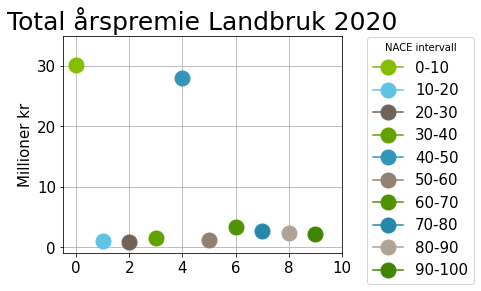

In [7]:
#kategoriene delt inn in 10 og 10 hele tall, NÅ ALLE L

a=res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '09.999')]
b=res.loc[(res['NACE'] >= '10.000')&(res['NACE'] <= '19.999')]
c=res.loc[(res['NACE'] >= '20.000')&(res['NACE'] <= '29.999')]
d=res.loc[(res['NACE'] >= '30.000')&(res['NACE'] <= '39.999')]
e=res.loc[(res['NACE'] >= '40.000')&(res['NACE'] <= '49.999')]
f=res.loc[(res['NACE'] >= '50.000')&(res['NACE'] <= '59.999')]
g=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '69.999')]
h=res.loc[(res['NACE'] >= '70.000')&(res['NACE'] <= '79.999')]
i=res.loc[(res['NACE'] >= '80.000')&(res['NACE'] <= '89.999')]
j=res.loc[(res['NACE'] >= '90.000')&(res['NACE'] <= '99.999')]

da = [a,b,c,d,e,f,g,h,i,j]; farger = [grønn,blå,grå,sjøgrønn]
tit = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/(10**6),marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.50, 1.03),prop={'size': 15},title="NACE intervall")
  ax.set_ylabel('Millioner kr',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  ax.set_ylim(-1,35); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Total årspremie Landbruk 2020',size=25)
ax.grid()

De største premiene ligger i 0-10 og 40-50

In [ ]:
res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '09.999')]['NACE'].value_counts()

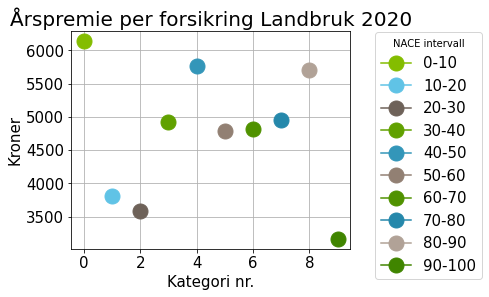

In [9]:
#Telle antall saker per 10er kategori og plott skadesum per ant
#MED ALLE L

#de neste linjene kan skrives i loop
aa=res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '09.999')]['NACE'].value_counts().sum()
bb=res.loc[(res['NACE'] >= '10.000')&(res['NACE'] <= '19.999')]['NACE'].value_counts().sum()
cc=res.loc[(res['NACE'] >= '20.000')&(res['NACE'] <= '29.999')]['NACE'].value_counts().sum()
dd=res.loc[(res['NACE'] >= '30.000')&(res['NACE'] <= '39.999')]['NACE'].value_counts().sum()
ee=res.loc[(res['NACE'] >= '40.000')&(res['NACE'] <= '49.999')]['NACE'].value_counts().sum()
ff=res.loc[(res['NACE'] >= '50.000')&(res['NACE'] <= '59.999')]['NACE'].value_counts().sum()
gg=res.loc[(res['NACE'] >= '60.000')&(res['NACE'] <= '69.999')]['NACE'].value_counts().sum()
hh=res.loc[(res['NACE'] >= '70.000')&(res['NACE'] <= '79.999')]['NACE'].value_counts().sum()
ii=res.loc[(res['NACE'] >= '80.000')&(res['NACE'] <= '89.999')]['NACE'].value_counts().sum()
jj=res.loc[(res['NACE'] >= '90.000')&(res['NACE'] <= '99.999')]['NACE'].value_counts().sum()

daa = [aa,bb,cc,dd,ee,ff,gg,hh,ii,jj]
da = [a,b,c,d,e,f,g,h,i,j]; farger = [grønn,blå,grå,sjøgrønn]
tit = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
fig,ax = plt.subplots(figsize=(5,4))
for count,vari in enumerate(da):
  ax.plot(count,vari['Årspremie'].sum()/daa[count],marker='o',color=colo[count],markersize=15,label=tit[count])
  ax.legend(bbox_to_anchor=(1.50, 1.03),prop={'size': 15},title='NACE intervall')
  ax.set_ylabel('Kroner',fontsize=15); ax.set_xlabel('Kategori nr.',fontsize=15)
  ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,10)
  ax.set_title('L21 2020')
ax.set_title('Årspremie per forsikring Landbruk 2020',size=20)
ax.grid()

In [ ]:
res['NACE'].value_counts().nlargest(10) #10 largest NACE counts

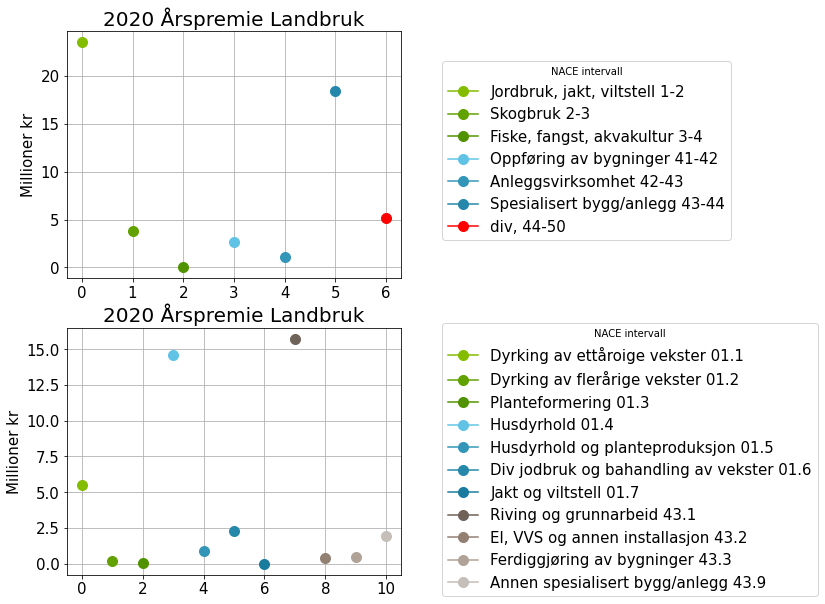

In [77]:
fig, ax = plt.subplots(2,1,figsize=(6,10))
'''
De største hovedkategoriene
'''

a=res.loc[(res['NACE'] >= '01.000')&(res['NACE'] <= '01.999')]
b=res.loc[(res['NACE'] >= '02.000')&(res['NACE'] <= '02.999')]
c=res.loc[(res['NACE'] >= '03.000')&(res['NACE'] <= '03.999')]
d=res.loc[(res['NACE'] >= '41.000')&(res['NACE'] <= '41.999')]
e=res.loc[(res['NACE'] >= '42.000')&(res['NACE'] <= '42.999')]
f=res.loc[(res['NACE'] >= '43.000')&(res['NACE'] <= '43.999')]
g=res.loc[(res['NACE'] >= '44.000')&(res['NACE'] <= '49.999')]

da = [a,b,c,d,e,f,g]; #farger = [grønn,blå,grå,sjøgrønn]
farger = [colo[0],colo[3],colo[6],colo[1],colo[4],colo[7],'r']
tit = ['Jordbruk, jakt, viltstell 1-2','Skogbruk 2-3','Fiske, fangst, akvakultur 3-4',
       'Oppføring av bygninger 41-42','Anleggsvirksomhet 42-43','Spesialisert bygg/anlegg 43-44','div, 44-50']
#fig,ax = plt.subplots(figsize=(5,4))
for i,j in enumerate(da):
  ax[0].plot(i,j['Årspremie'].sum()/(10**6),marker='o',color=farger[i],markersize=10,label=tit[i])
  ax[0].legend(bbox_to_anchor=(1.10, 0.91),prop={'size': 15},title='NACE intervall')
  ax[0].set_ylabel('Millioner kr',fontsize=15)
  ax[0].tick_params(axis = 'both', which = 'major', labelsize = 15)
  #ax.set_ylim(0,30); ax.set_xlim(-0.5,4)
ax[0].set_title('2020 Årspremie Landbruk',size = 20)
ax[0].grid()

'''
Kategoriene 1-2 og 43-44 totalt
'''

a=res.loc[(res['NACE'] >= '01.100')&(res['NACE'] <= '01.199')]
b=res.loc[(res['NACE'] >= '01.200')&(res['NACE'] <= '01.299')]
c=res.loc[(res['NACE'] >= '01.300')&(res['NACE'] <= '01.399')]
d=res.loc[(res['NACE'] >= '01.400')&(res['NACE'] <= '01.499')]
e=res.loc[(res['NACE'] >= '01.500')&(res['NACE'] <= '01.599')]
f=res.loc[(res['NACE'] >= '01.600')&(res['NACE'] <= '01.699')]
g=res.loc[(res['NACE'] >= '01.700')&(res['NACE'] <= '01.799')]
h=res.loc[(res['NACE'] >= '43.100')&(res['NACE'] <= '43.199')]
i=res.loc[(res['NACE'] >= '43.200')&(res['NACE'] <= '43.299')]
j=res.loc[(res['NACE'] >= '43.300')&(res['NACE'] <= '43.399')]
k=res.loc[(res['NACE'] >= '43.900')&(res['NACE'] <= '43.999')]

da = [a,b,c,d,e,f,g,h,i,j,k]; #farger = [grønn,blå,grå,sjøgrønn]
farger = [colo[0],colo[3],colo[6],colo[1],colo[4],colo[7],colo[10],colo[2],colo[5],colo[8],colo[11]]
tit = ['Dyrking av ettåroige vekster 01.1','Dyrking av flerårige vekster 01.2','Planteformering 01.3',
       'Husdyrhold 01.4','Husdyrhold og planteproduksjon 01.5','Div jodbruk og bahandling av vekster 01.6',
       'Jakt og viltstell 01.7',
       'Riving og grunnarbeid 43.1','El, VVS og annen installasjon 43.2','Ferdiggjøring av bygninger 43.3',
       'Annen spesialisert bygg/anlegg 43.9']
#fig,ax = plt.subplots(figsize=(5,4))
for i,j in enumerate(da):
  ax[1].plot(i,j['Årspremie'].sum()/(10**6),marker='o',color=farger[i],markersize=10,label=tit[i])
  ax[1].legend(bbox_to_anchor=(1.10, 1.05),prop={'size': 15},title='NACE intervall')
  ax[1].set_ylabel('Millioner kr',fontsize=15)
  ax[1].tick_params(axis = 'both', which = 'major', labelsize = 15)
ax[1].set_title('2020 Årspremie Landbruk',size=20)
ax[1].grid()